# Intro
At the end of this lesson, you will be able to write TensorFlow and Keras code to use one of the best models in computer vision.

# Lesson

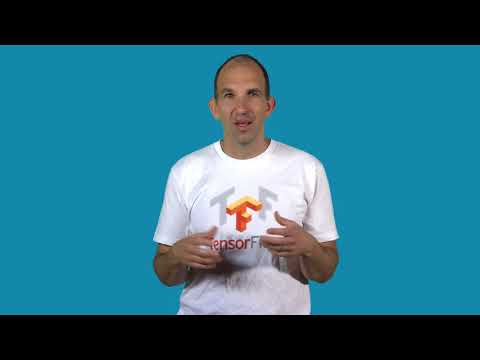

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('sDG5tPtsbSA', width=800, height=450)

# Sample Code
Choose Images to Work With

In [2]:
from os.path import join

image_dir = '../input/dog-breed-identification/train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

Function to Read and Prep Images for Modeling

In [3]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

Create Model with Pre-Trained Weights File. Make Predictions

In [4]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

Visualize Predictions

In [5]:
from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='../input/resnet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

ModuleNotFoundError: No module named 'learntools'

# Assignment
## Intro
The TV show *Silicon Valley* had an app called "See Food" that promised to identify food. 

In this notebook, you will write code using and comparing pre-trained models to choose one as an engine for the See Food app.

You won't go too deep into Keras or TensorFlow details in this particular exercise.  Don't worry. You'll go deeper into model development soon.  For now, you'll make sure you know how to use pre-trained models.

## Set-Up
We will run a few steps of environmental set-up before writing your own code. **You don't need to understand the details of this set-up code.** You can just run each code cell until you get to the exercises.

### 1) Create Image Paths
This workspace includes image files you will use to test your models. Run the cell below to store a few filepaths to these images in a variable `img_paths`.

In [6]:
import os
from os.path import join


hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog'

hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['823536.jpg',
                             '99890.jpg']]

img_paths = hot_dog_paths + not_hot_dog_paths

### 2) Run an Example Model
Here is the code you saw in the tutorial. It loads data, loads a pre-trained model, and makes predictions. Run this cell too.

In [7]:
from IPython.display import Image, display
from learntools.deep_learning.decode_predictions import decode_predictions
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array


image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

most_likely_labels = decode_predictions(preds, top=3)

ModuleNotFoundError: No module named 'learntools'

### 3) Visualize Predictions

In [8]:
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

NameError: name 'most_likely_labels' is not defined

### 4) Set Up Code Checking
As a last step before writing your own code, run the following cell to enable feedback on your code.

## Exercises

You will write a couple useful functions in the next exercises. Then you will put these functions together to compare the effectiveness of various pretrained models for your hot-dog detection program.

### Exercise 1

We want to distinguish whether an image is a hot dog or not. But our models classify pictures into 1000 different categories. Write a function that takes the models predictions (in the same format as `preds` from the set-up code) and returns a list of `True` and `False` values.

Some tips:
- Work iteratively. Figure out one line at a time outsie the function, and print that line's output to make sure it's right. Once you have all the code you need, move it into the function `is_hot_dog`. If you get an error, check that you have copied the right code and haven't left anything out.
- The raw data we loaded in `img_paths` had two images of hot dogs, followed by two images of other foods. So, if you run your function on `preds`, which represents the output of the model on these images, your function should return `[True, True, False, False]`.
- You will want to use the `decode_predictions` function that was also used in the code provided above. We provided a line with this in the code cell to get you started.


In [11]:
def is_hot_dog(preds):
    
    decoded = decode_predictions(preds, top=1)
    '''
    inputs:
    preds_array:  array of predictions from pre-trained model

    outputs:
    is_hot_dog_list: a list indicating which predictions show hotdog as the most likely label
    '''
    is_hot_dog_list = []
    for item in decoded:
        if item[0][1] == "hotdog":
            is_hot_dog_list.append(True)
        else:
            is_hot_dog_list.append(False)
    return is_hot_dog_list

### Exercise 2: Evaluate Model Accuracy

You have a model (called `my_model`). Is it good enough to build your app around? 

Find out by writing a function that calculates a model's accuracy (fraction correct). You will try an alternative model in the next step. So we will put this logic in a reusable function that takes data and the model as arguments, and returns the accuracy.

Tips:

 - Use the `is_hot_dog` function from above to help write your function
 - To save you some scrolling, here is the code from above where we used a TensorFlow model to make predictions:

```
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)
```

In [12]:
def calc_accuracy(model, paths_to_hotdog_images, paths_to_other_images):
    # We'll use the counts for denominator of accuracy calculation
    num_hot_dog_images = len(paths_to_hotdog_images)
    num_other_images = len(paths_to_other_images)

    hotdog_image_data = read_and_prep_images(paths_to_hotdog_images)
    preds_for_hotdogs = model.predict(hotdog_image_data)
    # Summing list of binary variables gives a count of True values
    num_correct_hotdog_preds = sum(is_hot_dog(preds_for_hotdogs))

    other_image_data = read_and_prep_images(paths_to_other_images)
    preds_other_images = model.predict(other_image_data)
    # Number correct is the number judged not to be hot dogs
    num_correct_other_preds = num_other_images - sum(is_hot_dog(preds_other_images))

    total_correct = num_correct_hotdog_preds + num_correct_other_preds
    total_preds = num_hot_dog_images + num_other_images
    return total_correct / total_preds



# Code to call calc_accuracy.  my_model, hot_dog_paths and not_hot_dog_paths were created in the setup code

my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)



my_model_accuracy = calc_accuracy(my_model, hot_dog_paths, not_hot_dog_paths)
print("Fraction correct in small test set: {}".format(my_model_accuracy))

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

### Exercise 3:
There are other models besides the ResNet model (which we have loaded). For example, an earlier winner of the ImageNet competition is the VGG16 model.  Don't worry about the differences between these models yet. We'll come back to that later. For now, just focus on the mechanics of applying these models to a problem.

The code used to load a pretrained ResNet50 model was

```
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
```

The weights for the model are stored at `../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5`.

In the cell below, create a VGG16 model with the preloaded weights. Then use your `calc_accuracy` function to determine what fraction of images the VGG16 model correctly classifies.  Is it better or worse than the pretrained ResNet model?

In [13]:
# import the model
from tensorflow.keras.applications import VGG16

vgg16_model = VGG16(weights='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
# calculate accuracy on small dataset as a test
vgg16_accuracy = calc_accuracy(vgg16_model, hot_dog_paths, not_hot_dog_paths)

print("Fraction correct in small dataset: {}".format(vgg16_accuracy))

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.